# DSC540 Project 3

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Write your code under the corresponding questions. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Click on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name at the beginning of the jupyter notebook.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML  
        
        
**DO NOT zip the files.**

Good Luck!

### SYED NOOR RAZI ALI

**Honor Pledge:**  
I pledge on my honor that I, **SYED NOOR RAZI ALI**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
import sklearn
sklearn.__version__

'1.0.2'

In [3]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

### These are the packages I used

In [4]:
# Your package imports here

> NOTE: For the Kernel RBF SVM hyper parameter tuning use these parameters in the questions:
        
        'C': [1, 10, 100, 1000]
        'gamma': [0.001, 0.01, 0.1, 1]

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


#### Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [5]:
df = pd.read_csv('gas_emissions.csv')

In [6]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [7]:
df.shape

(7384, 11)

#### Is there any missing data?

In [8]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [9]:
ans1 = df[df['CO'] > 3].groupby('CO').AP.mean()
         
ans1.mean()

1015.6816853391157

#### Create a correlation map between the variables. Which variables have high correlation (> |0.9|)?

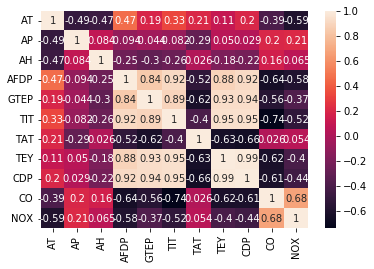

In [10]:
corr_map = df.corr()

sns.heatmap(corr_map, annot=True)

The following variales have correlation 
- CDP vs AFDP
- TIT vs AFDP
- CDP vs GTEP
- TEY vs GTEP
- TEY vs TIT
- CDP vs TIT
- CDP vs TEY

#### Create a scatter plot of 'TEY' vs 'CDP'

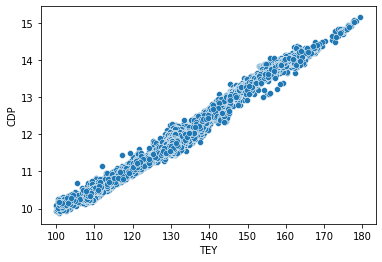

In [11]:
#df.plot(x="CDP", y="TEY", kind="scatter")
sns.scatterplot(x='TEY', y='CDP', data=df)

#### Create histograms for CO and NOX.

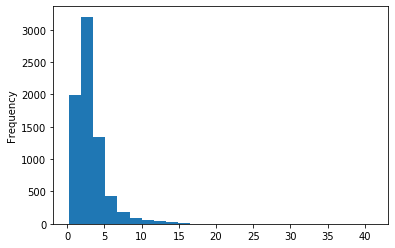

In [12]:
#sns.histplot(data=df, x='CO')
df['CO'].plot(kind='hist',bins=25)

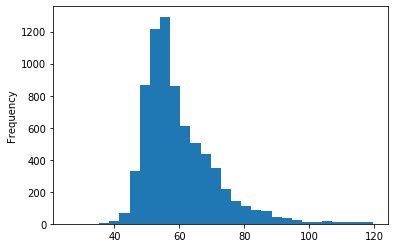

In [13]:
#sns.histplot(data=df, x='NOX')
df['NOX'].plot(kind='hist', bins=30)

#### Create a sctter plot of CO vs NOX.

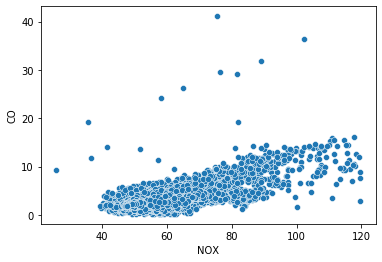

In [14]:
#df.plot(x='NOX', y='CO', kind='scatter')
sns.scatterplot(x='NOX', y='CO', data=df)

### Prepare data for machine learning

- We will predict CO using all the other variables.
- NOX, which is another emission gas, will not be used as predictor.
- CO is a continuous variable, thus we will be doing regression.
- Many of algorithms that do classification also have regression counterparts.

In [15]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [17]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [18]:
X_train.shape

(5316, 9)

In [19]:
X_val.shape

(1329, 9)

In [20]:
X_test.shape

(739, 9)

## Utility Functions

You can create helper functions.
For example, create functions that take the score and store it in a dataframe for a specific model.

In [21]:
scores_df = pd.DataFrame(columns=['Model', 'Score'])

def model_score(model_name, score):
    global scores_df
    scores_df = scores_df.append({'Model': model_name, 'Score': score}, ignore_index=True)
    print(f"Scores for {model_name}: {score}")

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ on training data?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE (Root Mean Squared Error) is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $\rightarrow$ square root $\rightarrow$ RMSE)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
# create a Linear Regression model
lr = LinearRegression()

lr.fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)
lr_val_pred = lr.predict(X_val)

train_r2 = r2_score(y_train, lr_train_pred)
val_r2 = r2_score(y_val, lr_val_pred)

train_rmse = mean_squared_error(y_train, lr_train_pred, squared=False)
val_rmse = mean_squared_error(y_val, lr_val_pred, squared=False)


In [24]:
#r2 of training data
model_score('Linear Regression (train_r2)', train_r2)

Scores for Linear Regression (train_r2): 0.6640090820784397


In [25]:
#r2 of validation data
model_score('Linear Regression (val_r2)', val_r2)

Scores for Linear Regression (val_r2): 0.646343190818214


In [26]:
# training rmse
model_score('Linear Regression (train_rmse)', train_rmse)

Scores for Linear Regression (train_rmse): 1.2720122104103535


In [27]:
# validaation rmse
model_score('Linear Regression (val_rmse)', val_rmse)

Scores for Linear Regression (val_rmse): 1.3884894690085985


In [28]:
scores_df

,Model,Score
0,Linear Regression (train_r2),0.664009
1,Linear Regression (val_r2),0.646343
2,Linear Regression (train_rmse),1.272012
3,Linear Regression (val_rmse),1.388489


## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop. 
    - During this process your training score will probably decrease, and that is OK. 

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

In [31]:
estimator.fit(X_train, y_train)

# Calculate the R2 score on the training data
rf_train_pred = estimator.predict(X_train)
rf_r2_train = r2_score(y_train, rf_train_pred)

# Calculate the R2 score on the validation data
rf_val_pred = estimator.predict(X_val)
rf_r2_val = r2_score(y_val, rf_val_pred)

# Calculate the RMSE on the training data
rf_rmse_train = mean_squared_error(y_train, rf_train_pred, squared=False)

# Calculate the RMSE on the validation data
rf_rmse_val = mean_squared_error(y_val, rf_val_pred, squared=False)


In [32]:
#r2 of training data
model_score('Random Forest (rf_r2_train)', rf_r2_train)

Scores for Random Forest (rf_r2_train): 0.9632120157429405


In [33]:
#r2 of validation data
model_score('Random Forest (rf_r2_val)', rf_r2_val)

Scores for Random Forest (rf_r2_val): 0.7561021332337717


In [34]:
# training rmse
model_score('Random Forest (rf_rmse_train)', rf_rmse_train)

Scores for Random Forest (rf_rmse_train): 0.4209015325868886


In [35]:
# validaation rmse
model_score('Random Forest (rf_rmse_val)', rf_rmse_val)

Scores for Random Forest (rf_rmse_val): 1.1530697502798055


In [36]:
scores_df

,Model,Score
0,Linear Regression (train_r2),0.664009
1,Linear Regression (val_r2),0.646343
2,Linear Regression (train_rmse),1.272012
3,Linear Regression (val_rmse),1.388489
4,Random Forest (rf_r2_train),0.963212
5,Random Forest (rf_r2_val),0.756102
6,Random Forest (rf_rmse_train),0.420902
7,Random Forest (rf_rmse_val),1.153070


In [37]:
diff = abs(rf_r2_train - rf_r2_val)
print("R-square difference between training and validation : {:.3f}".format(diff))

R-square difference between training and validation : 0.207


Given that the model's performance on the validation data is less than it is on the training data, it is possible that the model may have been overfitted. To enhance the validation performance, it could be essential to change the hyperparameters or modify the model.

In [38]:
# The parameter grid for the Random Forest model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'random_state': [99]
}

# Create a Random Forest Regression model
rf = RandomForestRegressor()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid=param_grid)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and fit the model on the training data
best_params = grid_search.best_params_
rf = RandomForestRegressor(**best_params)
rf.fit(X_train, y_train)

# Calculate the R2 score on the training data
rf1_train_pred = rf.predict(X_train)
rf1_r2_train = r2_score(y_train, rf1_train_pred)

# Calculate the R2 score on the validation data
rf1_val_pred = rf.predict(X_val)
rf1_r2_val = r2_score(y_val, rf1_val_pred)

# Calculate the RMSE on the training data
rf1_rmse_train = mean_squared_error(y_train, rf1_train_pred, squared=False)

# Calculate the RMSE on the validation data
rf1_rmse_val = mean_squared_error(y_val, rf1_val_pred, squared=False)


In [39]:
#r2 of training data with HyderParameters
model_score('Random Forest_HP (rf1_r2_train)', rf1_r2_train)

Scores for Random Forest_HP (rf1_r2_train): 0.827410524893622


In [40]:
#r2 of validation data with HyderParameters
model_score('Random Forest_HP (rf_r2_val)', rf1_r2_val)

Scores for Random Forest_HP (rf_r2_val): 0.7445067124524614


In [41]:
# training rmse with HyperParameters
model_score('Random Forest_HP (rf_rmse_train)', rf1_rmse_train)

Scores for Random Forest_HP (rf_rmse_train): 0.9116637050091692


In [42]:
# validaation rmse with HyperParameters
model_score('Random Forest_HP (rf_rmse_val)', rf1_rmse_val)

Scores for Random Forest_HP (rf_rmse_val): 1.1801611811898105


In [43]:
scores_df

,Model,Score
0,Linear Regression (train_r2),0.664009
1,Linear Regression (val_r2),0.646343
2,Linear Regression (train_rmse),1.272012
3,Linear Regression (val_rmse),1.388489
4,Random Forest (rf_r2_train),0.963212
5,Random Forest (rf_r2_val),0.756102
6,Random Forest (rf_rmse_train),0.420902
7,Random Forest (rf_rmse_val),1.153070
8,Random Forest_HP (rf1_r2_train),0.827411
9,Random Forest_HP (rf_r2_val),0.744507


In [44]:
rf2_diff = abs(rf1_r2_train - rf1_r2_val)
print("R-square difference between training and validation with HyperParameter : {:.3f}".format(rf2_diff))

R-square difference between training and validation with HyperParameter : 0.083


## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Do this for each of the models listed below using the default parameters:  
    1. **Linear kernel SVR**  
    2. **Polynomial kernel SVR**  
    3. **RBF kernel SVR** 

In [45]:
from sklearn.svm import SVR

### Linear SVM Regressor

In [46]:
estimator = SVR(kernel='linear')
estimator

SVR(kernel='linear')

In [47]:
estimator.fit(X_train, y_train)

SVM_train_pred = estimator.predict(X_train)
SVM_val_pred = estimator.predict(X_val)

SVM_r2_train = r2_score(y_train, SVM_train_pred)
SVM_rmse_train = np.sqrt(mean_squared_error(y_train, SVM_train_pred))

SVM_r2_val = r2_score(y_val, SVM_val_pred)
SVM_rmse_val = np.sqrt(mean_squared_error(y_val, SVM_val_pred))

In [48]:
#r2 of training data 
model_score('SVM (SVM_r2_train)', SVM_r2_train)

Scores for SVM (SVM_r2_train): 0.6244509939105645


In [49]:
#r2 of validation data
model_score('SVM (SVM_r2_val)', SVM_r2_val)

Scores for SVM (SVM_r2_val): 0.6021866187568015


In [50]:
# training rmse
model_score('SVM (SVM_rmse_train)', SVM_rmse_train)

Scores for SVM (SVM_rmse_train): 1.344809658561098


In [51]:
# validaation rmse
model_score('SVM (SVM_rmse_val)', SVM_rmse_val)

Scores for SVM (SVM_rmse_val): 1.4726219576265938


In [52]:
scores_df

,Model,Score
0,Linear Regression (train_r2),0.664009
1,Linear Regression (val_r2),0.646343
2,Linear Regression (train_rmse),1.272012
3,Linear Regression (val_rmse),1.388489
4,Random Forest (rf_r2_train),0.963212
5,Random Forest (rf_r2_val),0.756102
6,Random Forest (rf_rmse_train),0.420902
7,Random Forest (rf_rmse_val),1.153070
8,Random Forest_HP (rf1_r2_train),0.827411
9,Random Forest_HP (rf_r2_val),0.744507


### Polynomial Kernel SVM Regressor

In [53]:
from sklearn.svm import SVR
estimator = SVR(kernel='poly')

In [54]:
estimator.fit(X_train, y_train)
# Predictions on training and validation 
PSVM_train_pred = estimator.predict(X_train)
PSVM_val_pred = estimator.predict(X_val)

# Calculate R2 and RMSE on training set
PSVM_r2_train = r2_score(y_train, PSVM_train_pred)
PSVM_rmse_train = np.sqrt(mean_squared_error(y_train, PSVM_train_pred))

# Calculate R2 and RMSE on validation set
PSVM_r2_val = r2_score(y_val, PSVM_val_pred)
PSVM_rmse_val = np.sqrt(mean_squared_error(y_val, PSVM_val_pred))

In [55]:
#r2 of training data 
model_score('Polynomial SVM (PSVM_r2_train)', PSVM_r2_train)

Scores for Polynomial SVM (PSVM_r2_train): 0.7404852376508437


In [56]:
#r2 of validation data
model_score('Polynomial SVM (PSVM_r2_val)', PSVM_r2_val)

Scores for Polynomial SVM (PSVM_r2_val): 0.7310487212257788


In [57]:
# training rmse
model_score('Polynomial SVM (PSVM_rmse_train)', PSVM_rmse_train)

Scores for Polynomial SVM (PSVM_rmse_train): 1.1179143857689002


In [58]:
# validaation rmse
model_score('Polynomial SVM (PSVM_rmse_val)', PSVM_rmse_val)

Scores for Polynomial SVM (PSVM_rmse_val): 1.2108445318365113


In [59]:
scores_df

,Model,Score
0,Linear Regression (train_r2),0.664009
1,Linear Regression (val_r2),0.646343
2,Linear Regression (train_rmse),1.272012
3,Linear Regression (val_rmse),1.388489
4,Random Forest (rf_r2_train),0.963212
5,Random Forest (rf_r2_val),0.756102
6,Random Forest (rf_rmse_train),0.420902
7,Random Forest (rf_rmse_val),1.153070
8,Random Forest_HP (rf1_r2_train),0.827411
9,Random Forest_HP (rf_r2_val),0.744507


### RBF Kernel SVM Regressor

In [60]:
from sklearn.svm import SVR
estimator = SVR(kernel='rbf')

In [61]:
estimator.fit(X_train, y_train)

SVR_train_pred = estimator.predict(X_train)
SVR_val_pred = estimator.predict(X_val)

# Calculate R2 and RMSE on training set
SVR_r2_train = r2_score(y_train, SVR_train_pred)
SVR_rmse_train = np.sqrt(mean_squared_error(y_train, SVR_train_pred))

# Calculate R2 and RMSE on validation set
SVR_r2_val = r2_score(y_val, SVR_val_pred)
SVR_rmse_val = np.sqrt(mean_squared_error(y_val, SVR_val_pred))

In [62]:
#r2 of training data 
model_score('SVM(RBF) (SVR_r2_train)', SVR_r2_train)

Scores for SVM(RBF) (SVR_r2_train): 0.765323708752557


In [63]:
#r2 of validation data
model_score('SVM(RBF) (SVR_r2_val)', SVR_r2_val)

Scores for SVM(RBF) (SVR_r2_val): 0.7476206398521968


In [64]:
# training rmse
model_score('SVM(RBF) (SVR_rmse_train)', SVR_rmse_train)

Scores for SVM(RBF) (SVR_rmse_train): 1.0630706284209859


In [65]:
# validaation rmse
model_score('SVM(RBF) (SVR_rmse_val)', SVR_rmse_val)

Scores for SVM(RBF) (SVR_rmse_val): 1.1729472882611478


In [66]:
scores_df

,Model,Score
0,Linear Regression (train_r2),0.664009
1,Linear Regression (val_r2),0.646343
2,Linear Regression (train_rmse),1.272012
3,Linear Regression (val_rmse),1.388489
4,Random Forest (rf_r2_train),0.963212
5,Random Forest (rf_r2_val),0.756102
6,Random Forest (rf_rmse_train),0.420902
7,Random Forest (rf_rmse_val),1.153070
8,Random Forest_HP (rf1_r2_train),0.827411
9,Random Forest_HP (rf_r2_val),0.744507


### Q5 [10]

- Take RBF Kernel SVM and perform hyperparameter tuning. See if you can increase the $R^2$ score.   
    - Use:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  

    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
# Define the model
svr = SVR(kernel='rbf')

# Define the hyperparameters to tune
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1]}

# Perform GridSearchCV with 5-fold cross validation
grid = GridSearchCV(svr, param_grid, cv=5)
grid.fit(X_train, y_train)

# The best hyperparameters and the corresponding R2 score
print("R2 of training data:", grid.best_score_)
print("R2 of validation data:", grid.score(X_val, y_val))

# Predict on the training, validation, and testing sets
GS_train_pred = grid.predict(X_train)
GS_val_pred = grid.predict(X_val)

# Calculate the RMSE on the training, validation, and testing sets
from sklearn.metrics import mean_squared_error

GS_rmse_train = mean_squared_error(y_train, GS_train_pred, squared=False)
GS_rmse_val = mean_squared_error(y_val, GS_val_pred, squared=False)

print("RMSE of training data:", GS_rmse_train)
print("RMSE of validation data:", GS_rmse_val)


R2 of training data: 0.7851026548753166
R2 of validation data: 0.7568567058132706
RMSE of training data: 1.0002456417533572
RMSE of validation data: 1.1512846817366564


## Q6 [10]

- Apply PCA and transform the data. 
    - For PCA we need to decide on the number of  components. Take sufficient number of components based on variance explained 
        - generally it is chosen as the number of components that can explain 90% of the variance 
        - or cross-validation accuracy using an ML model.

- Use the PCA transformed data to perform regression. Use the models: 
    - Linear Regression
    - Random Forest Regression (Optional to do hyper parameter tuning)
    - RBF Kernel Support Vector Regression (Optional to do hyper parameter tuning)
  
- For each model:  
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare `PCA RBF SVR` with the `RBF SVR` model from before. Do you observe any change in performance? Please explain. 


In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.58158952 0.78924196 0.88751722 0.94337792 0.98704348 0.9959942
 0.99975821 0.99992456 1.        ]


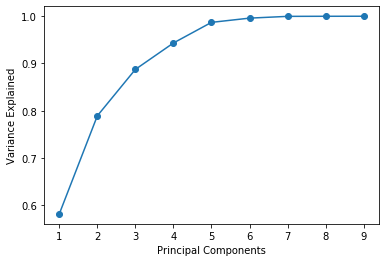

In [71]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

Choose the number of components.

In [72]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

**Linear Regression with PCA transformed data**

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_pca2, y_train)
pca_train_pred = lin_reg.predict(X_train_pca2)
pca_val_pred = lin_reg.predict(X_val_pca2)

pca_R2_train = lin_reg.score(X_train_pca2, y_train)
pca_R2_val = lin_reg.score(X_val_pca2, y_val)

pca_rmse_train = np.sqrt(mean_squared_error(y_train, pca_train_pred))
pca_rmse_val = np.sqrt(mean_squared_error(y_val, pca_val_pred))

print("Linear Regression with PCA")


Linear Regression with PCA


In [74]:
#r2 of training data
model_score('Linear Regression with PCA (train_r2)', pca_R2_train)

Scores for Linear Regression with PCA (train_r2): 0.6557906042002006


In [75]:
#r2 of validation data
model_score('Linear Regression with PCA(val_r2)', pca_R2_val)

Scores for Linear Regression with PCA(val_r2): 0.6333206399655548


In [76]:
# training rmse
model_score('Linear Regression with PCA (train_rmse)', pca_rmse_train)

Scores for Linear Regression with PCA (train_rmse): 1.2874751982855395


In [77]:
# validaation rmse
model_score('LInear Regression with PCA (rf_rmse_val)', pca_rmse_val)

Scores for LInear Regression with PCA (rf_rmse_val): 1.413822244602062


**RF Regression with PCA transformed data**

In [78]:
rf = RandomForestRegressor(random_state=99)
param_grid = {'n_estimators': [10, 50, 100, 200],
'max_depth': [5, 10, 20, None],
'min_samples_split': [2, 5, 10]}

In [79]:
rf_grid = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='r2')
rf_grid.fit(X_train_pca2, y_train)

best_rf = rf_grid.best_estimator_
best_rf.fit(X_train_pca2, y_train)

pcaRF_train_pred = best_rf.predict(X_train_pca2)
pcaRF_val_pred = best_rf.predict(X_val_pca2)

pcaRF_R2_train = best_rf.score(X_train_pca2, y_train)
pcaRF_R2_val = best_rf.score(X_val_pca2, y_val)

pcaRF_rmse_train = np.sqrt(mean_squared_error(y_train, pcaRF_train_pred))
pcaRF_rmse_val = np.sqrt(mean_squared_error(y_val, pcaRF_val_pred))

print("RF Regression with PCA")
print("R2 on training data:", pcaRF_R2_train)
print("R2 on validation data:", pcaRF_R2_val)
print("RMSE on training data:", pcaRF_rmse_train)
print("RMSE on validation data:", pcaRF_rmse_val)

RF Regression with PCA
R2 on training data: 0.9646150583913384
R2 on validation data: 0.7381859665068906
RMSE on training data: 0.41279720945738463
RMSE on validation data: 1.1946702221832866


In [139]:
#r2 of training data
model_score('Random Forest with PCA (train_r2)', pcaRF_R2_train)

Scores for Random Forest with PCA (train_r2): 0.9646150583913384


In [140]:
#r2 of validation data
model_score('Random Forest with PCA(val_r2)', pcaRF_R2_val)

Scores for Random Forest with PCA(val_r2): 0.7381859665068906


In [141]:
# training rmse
model_score('Random Forest with PCA (train_rmse)', pcaRF_rmse_train)

Scores for Random Forest with PCA (train_rmse): 0.41279720945738463


In [142]:
# validaation rmse
model_score('Random Forest with PCA (rf_rmse_val)', pcaRF_rmse_val)

Scores for Random Forest with PCA (rf_rmse_val): 1.1946702221832866


**SVM Regression with PCA transformed data**

In [80]:
rbf_svr = SVR(kernel='rbf')

param_grid = {'C': [0.1, 1, 10, 100],
'gamma': [0.1, 1, 10, 100]}

rbf_svr_grid = GridSearchCV(rbf_svr, param_grid=param_grid, cv=5, scoring='r2')
rbf_svr_grid.fit(X_train_pca2, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]},
             scoring='r2')

In [81]:
rbf_svr_grid = rbf_svr_grid.best_estimator_
rbf_svr_grid.fit(X_train_pca2, y_train)

Rsvr_train_pred = rbf_svr_grid.predict(X_train_pca2)
Rsvr_val_pred = rbf_svr_grid.predict(X_val_pca2)

Rsvr_R2_train = rbf_svr_grid.score(X_train_pca2, y_train)
Rsvr_R2_val = rbf_svr_grid.score(X_val_pca2, y_val)

Rsvr_rmse_train = np.sqrt(mean_squared_error(y_train, Rsvr_train_pred))
Rsvr_rmse_val = np.sqrt(mean_squared_error(y_val, Rsvr_val_pred))

print("SVM Regression with PCA")

SVM Regression with PCA


In [82]:
#r2 of training data 
model_score('SVM(RBF) on PCA (SVR_r2_train)', Rsvr_R2_train)

Scores for SVM(RBF) on PCA (SVR_r2_train): 0.7888301979504186


In [83]:
#r2 of validation data
model_score('SVM(RBF) on PCA (SVR_r2_val)', Rsvr_R2_val)

Scores for SVM(RBF) on PCA (SVR_r2_val): 0.7521924013461454


In [84]:
# training rmse
model_score('SVM(RBF) on PCA (SVR_rmse_train)', Rsvr_rmse_train)

Scores for SVM(RBF) on PCA (SVR_rmse_train): 1.008424567507621


In [85]:
# validaation rmse
model_score('SVM(RBF)on PCA (SVR_rmse_val)', Rsvr_rmse_val)

Scores for SVM(RBF)on PCA (SVR_rmse_val): 1.1622749766126788


In [86]:
scores_df

,Model,Score
0,Linear Regression (train_r2),0.664009
1,Linear Regression (val_r2),0.646343
2,Linear Regression (train_rmse),1.272012
3,Linear Regression (val_rmse),1.388489
4,Random Forest (rf_r2_train),0.963212
5,Random Forest (rf_r2_val),0.756102
6,Random Forest (rf_rmse_train),0.420902
7,Random Forest (rf_rmse_val),1.153070
8,Random Forest_HP (rf1_r2_train),0.827411
9,Random Forest_HP (rf_r2_val),0.744507


## Q7 [10]

#### Let's do  classification 

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [87]:
from sklearn.preprocessing import Binarizer

In [88]:
binarizer = Binarizer(threshold=3)

In [89]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [90]:
y_train_cat = pd.Series(y_train_cat)

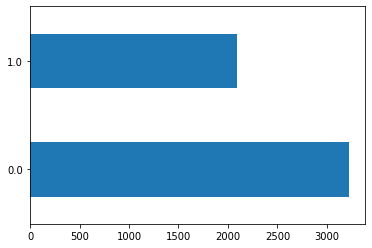

In [91]:
y_train_cat.value_counts().plot.barh()

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data 
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data 
- Using the **pca** transformed training data `X_train_pca2` perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set `X_val_pca2`:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score


In [98]:
from sklearn.svm import SVC

In [99]:
estimator = SVC(kernel ='rbf')

#### SVC Model 1 

In [100]:
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train_cat)
best_svc = grid_search.best_estimator_
best_svc.fit(X_train, y_train_cat)
svc_val_pred = best_svc.predict(X_val)

C:\Users\razia\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\razia\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\razia\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [101]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
cfm = metrics.confusion_matrix(y_val_cat, svc_val_pred)
print('Confusion matrix:')
print(cfm)

Confusion matrix:
[[766  46]
 [ 71 446]]


In [102]:
print(metrics.classification_report(y_val_cat, svc_val_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       812
         1.0       0.91      0.86      0.88       517

    accuracy                           0.91      1329
   macro avg       0.91      0.90      0.91      1329
weighted avg       0.91      0.91      0.91      1329



In [103]:
tn, fp, fn, tp = cfm.ravel()
recall = recall_score(y_val_cat, svc_val_pred)
print("recall",recall)
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
balanced_accuracy = (recall + specificity) / 2
print("balanced_accuracy",balanced_accuracy)
print("Specificity:", specificity)
print("False Positive Rate:", fpr)

recall 0.8626692456479691
balanced_accuracy 0.9030094996712752
Specificity: 0.9433497536945813
False Positive Rate: 0.05665024630541872


#### SVC Model 2

In [104]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [0.1, 1, 10]}

grid_search = GridSearchCV(estimator, param_grid, cv=5)
grid_search.fit(X_train_pca2, y_train_cat)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_estimator = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_estimator.fit(X_train_pca2, y_train_cat)

svc2_val_pred = best_estimator.predict(X_val_pca2)

In [105]:
cfm2 = confusion_matrix(y_val_cat, svc2_val_pred)
print(cfm2)


[[764  48]
 [ 70 447]]


In [106]:
print(metrics.classification_report(y_val_cat, svc2_val_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       812
         1.0       0.90      0.86      0.88       517

    accuracy                           0.91      1329
   macro avg       0.91      0.90      0.91      1329
weighted avg       0.91      0.91      0.91      1329



In [107]:
recall = recall_score(y_val_cat, svc2_val_pred)
print("recall",recall)
precision = precision_score(y_val_cat, svc2_val_pred)
f1 = f1_score(y_val_cat, svc2_val_pred)

tn, fp, fn, tp = cfm2.ravel()
specificity = tn / (tn + fp)
print("specificity",specificity)
fpr = fp / (fp + tn)
print("False Positive Rate:", fpr)
balanced_accuracy = (recall + specificity) / 2
print("balanced_accuracy",balanced_accuracy)

recall 0.8646034816247582
specificity 0.9408866995073891
False Positive Rate: 0.059113300492610835
balanced_accuracy 0.9027450905660737


## Q8 [10]

- For regression:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

In [115]:
# Regression for Feature selection and Ensemble method 
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

In [116]:
# split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [117]:
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', RFE(Ridge(alpha=0.1))),
    ('regression', Ridge(alpha=0.1))
])
# train and evaluate the best pipeline on the validation set
pipeline1.fit(X_train, y_train)
rr_val_pred = pipeline1.predict(X_val)
rr_r2_val1 = r2_score(y_val, rr_val_pred)
rr_rmse_val1 = np.sqrt(mean_squared_error(y_val, rr_val_pred))

print("R2 score for validation set with feature selection:", rr_r2_val1)
print("RMSE for validation set with feature selection:", rr_rmse_val1)


R2 score for validation set with feature selection: 0.6281270406953352
RMSE for validation set with feature selection: 1.4237996373671455


In [118]:
# pipeline for PCA-transformed data with Random Forest regression
pipeline2 = Pipeline([
    ('pca', PCA(n_components=5)),
    ('regression', RandomForestRegressor())
])

# use GridSearchCV to tune hyperparameters of the Random Forest regression
param_grid = {
    'regression__n_estimators': [50, 100, 200],
    'regression__max_depth': [5, 10, 20, None],
    'regression__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(pipeline2, param_grid=param_grid, cv=5,)
grid_search.fit(X_train, y_train)

# train and evaluate the best pipeline on the validation set
best_pipeline = grid_search.best_estimator_
plr_val_pred = best_pipeline.predict(X_val)
plr_r2_val2 = r2_score(y_val, plr_val_pred)
plr_rmse_val2 = np.sqrt(mean_squared_error(y_val, plr_val_pred))

print("R2 score for validation set with Random Forest regression:", plr_r2_val2)
print("RMSE for validation set with Random Forest regression:", plr_rmse_val2)

R2 score for validation set with Random Forest regression: 0.7469267516336956
RMSE for validation set with Random Forest regression: 1.1745586237604941


The performance of the validation increases,
Random Forest Regression appears to do the best on the validation set, according on the R-squared and RMSE values. It is able to explain the greatest amount of variation in the target variable and has the fewest prediction mistakes thanks to its highest R-squared value and lowest RMSE value.

## Q9 [10]

- For classification:
    - Try at least one classifier other than SVM (RF, GBM, Logistic Regression, etc). 
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

# Trying to improve the performance using Feature Selection

In [122]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(mutual_info_classif, k=5)
X_train_selected = selector.fit_transform(X_train_pca2, y_train_cat)
X_val_selected = selector.transform(X_val_pca2)

svm = SVC(kernel='rbf', C=1, gamma=0.1)
svm.fit(X_train_selected, y_train_cat)

FS_val_pred = svm.predict(X_val_selected)


recall = recall_score(y_val_cat, FS_val_pred)
print('recall',recall)
precision = precision_score(y_val_cat, FS_val_pred)
print('precision',precision)
f1 = f1_score(y_val_cat, FS_val_pred)
print('f1',f1)
tn, fp, fn, tp = cfm2.ravel()
specificity = tn / (tn + fp)
print('specificity',specificity)

balanced_accuracy = (recall + specificity) / 2
print('balanced_accuracy',balanced_accuracy)


recall 0.8820116054158608
precision 0.8958742632612967
f1 0.888888888888889
specificity 0.9408866995073891
balanced_accuracy 0.911449152461625


In [125]:
conf_matrix = confusion_matrix(y_val_cat, FS_val_pred)
print(conf_matrix)

[[759  53]
 [ 61 456]]


In [126]:
print(metrics.classification_report(y_val_cat, FS_val_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       812
         1.0       0.90      0.88      0.89       517

    accuracy                           0.91      1329
   macro avg       0.91      0.91      0.91      1329
weighted avg       0.91      0.91      0.91      1329



# Trying to improve the performance Using Random forest Classifier

In [119]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(X_train_pca2, y_train_cat)

rfc_val_pred = rf.predict(X_val_pca2)


recall = recall_score(y_val_cat, rfc_val_pred)
print('recall',recall)
precision = precision_score(y_val_cat, rfc_val_pred)
print('precision',precision)
f1 = f1_score(y_val_cat, rfc_val_pred)
print('f1',f1)
tn, fp, fn, tp = cfm2.ravel()
specificity = tn / (tn + fp)
print('specificity',specificity)
balanced_accuracy = (recall + specificity) / 2
print('balanced_accuracy',balanced_accuracy)

recall 0.8568665377176016
precision 0.9022403258655805
f1 0.8789682539682541
specificity 0.9408866995073891
balanced_accuracy 0.8988766186124953


In [120]:
cfm3 = confusion_matrix(y_val_cat, rfc_val_pred)
print(cfm3)

[[764  48]
 [ 74 443]]


In [121]:
print(metrics.classification_report(y_val_cat, rfc_val_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       812
         1.0       0.90      0.86      0.88       517

    accuracy                           0.91      1329
   macro avg       0.91      0.90      0.90      1329
weighted avg       0.91      0.91      0.91      1329



## Q10 [10]

- Choose the best 2 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the R^2 and RMSE performance metrics on test data for each model.
- Which model is best for regression? Is this in line with your analysis (the validation performance of the models) or is this not expected?



- Choose the best 2 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metrics (accuracy, recall, precision, f1-score, etc.) on test data for each model. 
- Which model is best for classification? Is this in line with your analysis (the validation performance of the models) or is this not expected? 



> Note that the same transformation used during training should be applied on the testing set. (If you applied PCA on training data for the selected model, you need to apply PCA on the testing set as well.) 



In [128]:
# YOUR CODE
scores_df

,Model,Score
0,Linear Regression (train_r2),0.664009
1,Linear Regression (val_r2),0.646343
2,Linear Regression (train_rmse),1.272012
3,Linear Regression (val_rmse),1.388489
4,Random Forest (rf_r2_train),0.963212
5,Random Forest (rf_r2_val),0.756102
6,Random Forest (rf_rmse_train),0.420902
7,Random Forest (rf_rmse_val),1.153070
8,Random Forest_HP (rf1_r2_train),0.827411
9,Random Forest_HP (rf_r2_val),0.744507


As we see here in the above dataframe the two best regressors that perform well are Random Forests and Random Forests with Pca

In [146]:
best_models = scores_df[scores_df['Model'].str.contains('Random Forest')]
best_models

,Model,Score
4,Random Forest (rf_r2_train),0.963212
5,Random Forest (rf_r2_val),0.756102
6,Random Forest (rf_rmse_train),0.420902
7,Random Forest (rf_rmse_val),1.153070
8,Random Forest_HP (rf1_r2_train),0.827411
9,Random Forest_HP (rf_r2_val),0.744507
10,Random Forest_HP (rf_rmse_train),0.911664
11,Random Forest_HP (rf_rmse_val),1.180161
32,Random Forest with PCA (train_r2),0.964615
33,Random Forest with PCA(val_r2),0.738186


In [147]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
estimator.fit(X_test, y_test)

# Calculate the R2 score on the test data
rf_test_pred = estimator.predict(X_test)
print("The R2 score of the model using the test data is: ", r2_score(y_test, rf_test_pred))

The R2 score of the model using the test data is:  0.9223812985932226


In [151]:
# Calculate the RMSE on the test data
rf_rmse_test = mean_squared_error(y_test, rf_test_pred, squared=False)
print("The RMSE on the test data is: ", rf_rmse_test)

The RMSE on the test data is:  0.6502028840617012


The best two classification models are SVM classifiers and Random Forest Classifiers

In [159]:
from sklearn.ensemble import RandomForestClassifier

r_f = RandomForestClassifier(n_estimators=100, max_depth=5)
r_f.fit(X_train_pca2, y_train_cat)

r_f_val_pred = rf.predict(X_val_pca2)
pred_Train = r_f.predict(X_train_pca2)
print("Accuracy of training :",metrics.accuracy_score(y_train_cat, pred_Train))

pred_Test = rf.predict(X_test_pca2)

print("Accuracy of testing:",metrics.accuracy_score(y_test_cat, pred_Test))

Accuracy of training : 0.919112114371708
Accuracy of testing: 0.9161028416779432


In [161]:
print(metrics.classification_report(y_test_cat, pred_Test))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       467
         1.0       0.90      0.87      0.88       272

    accuracy                           0.92       739
   macro avg       0.91      0.91      0.91       739
weighted avg       0.92      0.92      0.92       739



- What did you learn in this project? Any suggestions?

There was some ambiguity regarding the expectations for a few of the questions such as #10. The initial code snippets are very much appreciated, 
For this project, I learned about the sklearn's model selections and metrics.  I see how this tool can be very useful regarding classification and Regression.  I also have discovered that many models must be created and then attempt to find the model that has the best fit with the data.

# Thank you
Ilyas Ustun  
twitter: \_ilyas\_ustun\_